# Chuẩn hoá dữ liệu với Z-Score Scaling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [4]:
df.head()

,beta,exponential,normal_p,normal_l
0,54.754774,0.899861,12.094934,8.982752
1,55.737397,20.071849,9.099535,14.277640
2,19.226301,0.003861,10.859392,4.114352
3,52.495617,6.668447,9.407886,8.613123
4,53.922292,6.182693,9.244740,5.927098


In [5]:
# Thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [6]:
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,54.754774,0.899861,12.094934,8.982752,17.595572
1,55.737397,20.071849,9.099535,14.277640,19.786546
2,19.226301,0.003861,10.859392,4.114352,23.667946
3,52.495617,6.668447,9.407886,8.613123,19.335549
4,53.922292,6.182693,9.244740,5.927098,19.773147


## Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

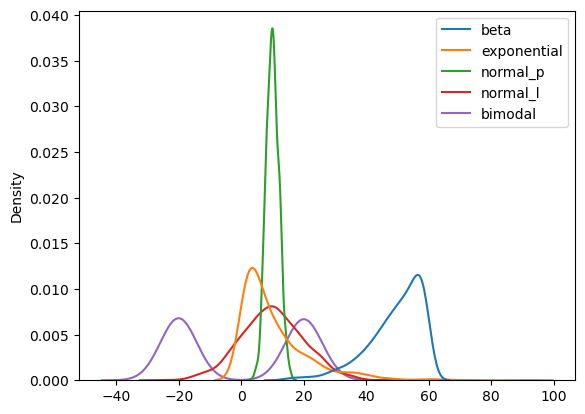

In [7]:
sns.kdeplot(data=df)

## Hiển thị thống kê về dữ liệu sinh ra

In [8]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.424756,10.532075,9.998958,9.934584,-0.045845
std,8.781856,11.074718,2.034534,10.076367,20.301165
min,14.276326,0.003861,3.480748,-24.900203,-29.422308
25%,44.791080,2.860658,8.566209,3.085302,-20.117664
50%,51.542688,6.715649,9.984748,9.793849,0.335130
75%,56.382210,14.327461,11.391329,16.550231,20.005681
max,59.985594,91.350543,15.971382,46.512992,30.265007


## Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

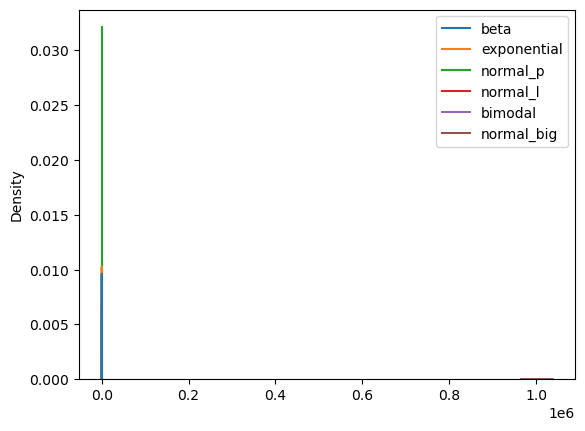

In [9]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

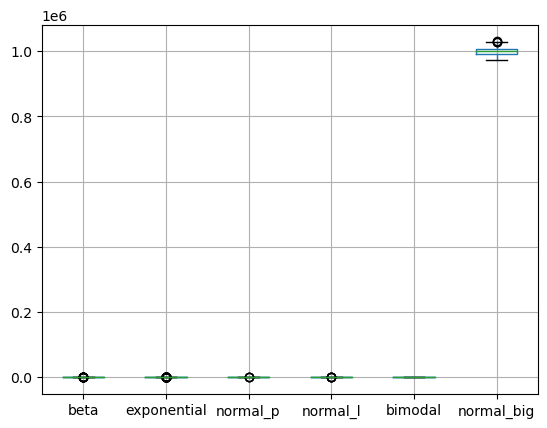

In [10]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

## Chuẩn hóa với StandardScaler (Z-Score scaling)

In [11]:
s_scaler = StandardScaler()

In [12]:
df_s = s_scaler.fit_transform(df)

col_names = list(df.columns)

df_s = pd.DataFrame(df_s, columns = col_names)

In [13]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.607239,-0.870183,1.030715,-0.094509,0.869420,-0.315612
1,0.719187,0.861832,-0.442300,0.431230,0.977398,-1.349994
2,-3.440453,-0.951129,0.423126,-0.577901,1.168684,0.268744
3,0.349857,-0.349044,-0.290665,-0.131210,0.955171,0.906623
4,0.512396,-0.392927,-0.370894,-0.397910,0.976737,-1.006469


<AxesSubplot:ylabel='Density'>

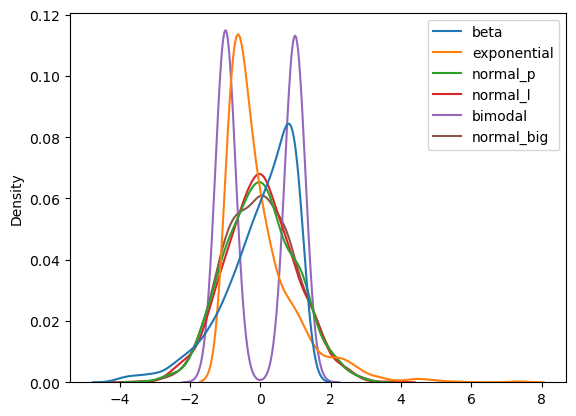

In [15]:
sns.kdeplot(data = df_s)

In [16]:
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.526379e-16,-1.045830e-16,-2.045031e-16,1.632028e-17,-9.758860e-17,1.556355e-14
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.004395e+00,-9.511287e-01,-3.205388e+00,-3.458808e+00,-1.447757e+00,-2.760050e+00
25%,-5.279059e-01,-6.930430e-01,-7.045675e-01,-6.800774e-01,-9.891975e-01,-7.339008e-01
50%,2.412920e-01,-3.447795e-01,-6.987981e-03,-1.397383e-02,1.877556e-02,-1.265170e-02
75%,7.926498e-01,3.428787e-01,6.847106e-01,6.568793e-01,9.881974e-01,6.975786e-01
max,1.203177e+00,7.301216e+00,2.936993e+00,3.631935e+00,1.493807e+00,3.027499e+00


<AxesSubplot:>

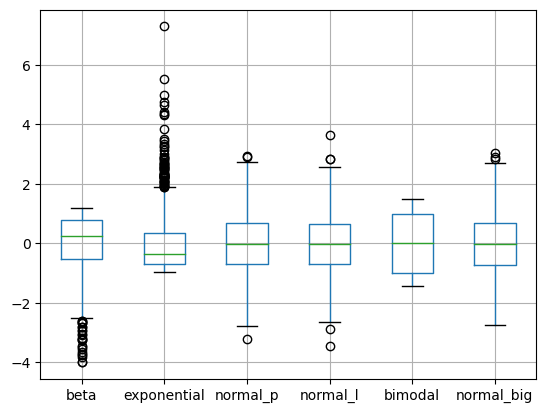

In [17]:
df_s.boxplot()